In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

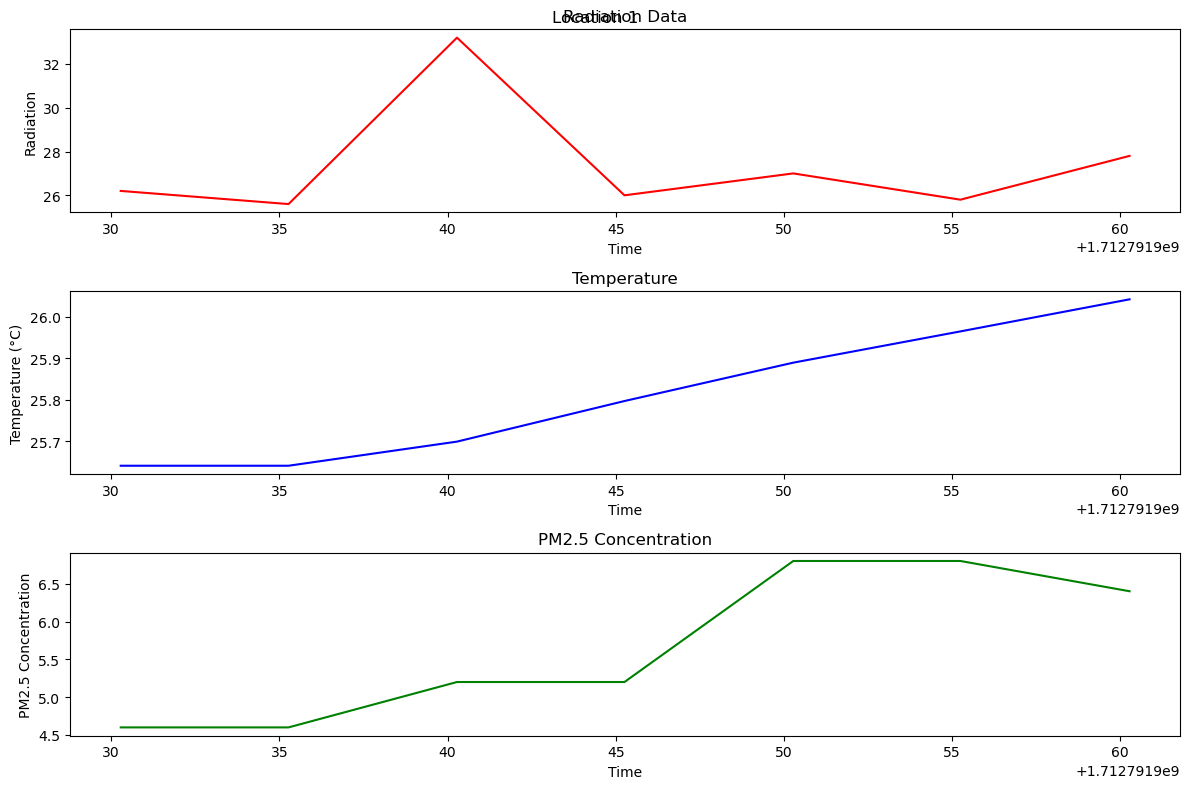

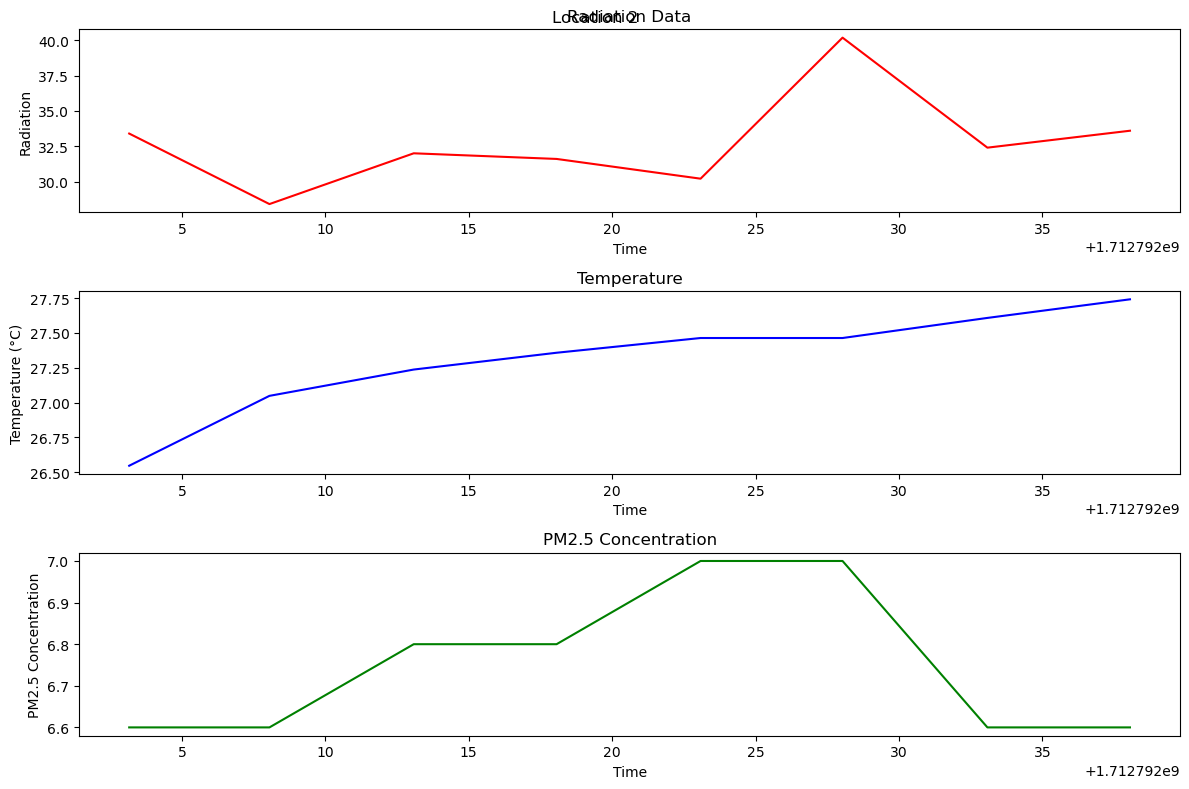

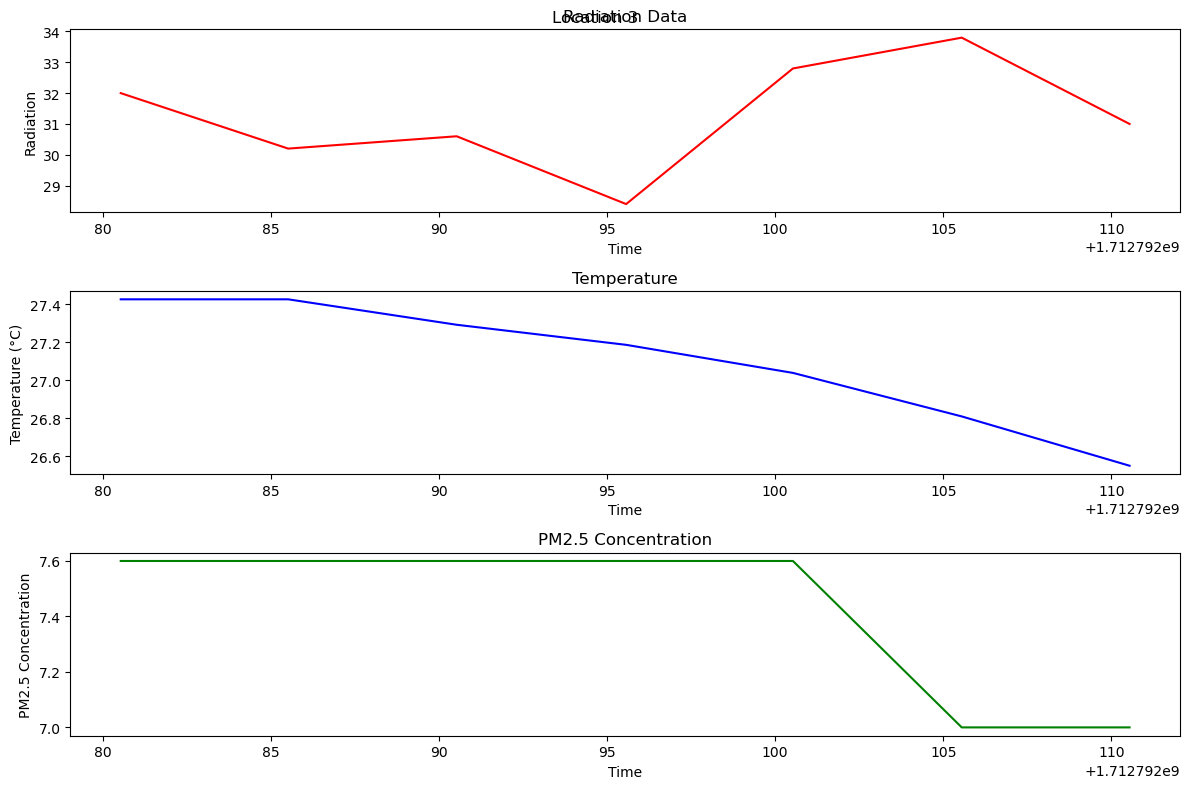

In [3]:
def create_plots(location_data, location_name):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(location_data['Time'], location_data['counts'], color='red')
    plt.title('Radiation Data')
    plt.xlabel('Time')
    plt.ylabel('Radiation')

    plt.subplot(3, 1, 2)
    plt.plot(location_data['Time'], location_data['Temperature'], color='blue')
    plt.title('Temperature')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')

    plt.subplot(3, 1, 3)
    plt.plot(location_data['Time'], location_data['PM25'], color='green')
    plt.title('PM2.5 Concentration')
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Concentration')

    plt.tight_layout()
    plt.suptitle(location_name)
    plt.show()

Location1 = pd.read_csv('Loc1.csv')
Location2 = pd.read_csv('Loc2.csv')
Location3 = pd.read_csv('Loc3.csv')

create_plots(Location1, 'Location 1')
create_plots(Location2, 'Location 2')
create_plots(Location3, 'Location 3')

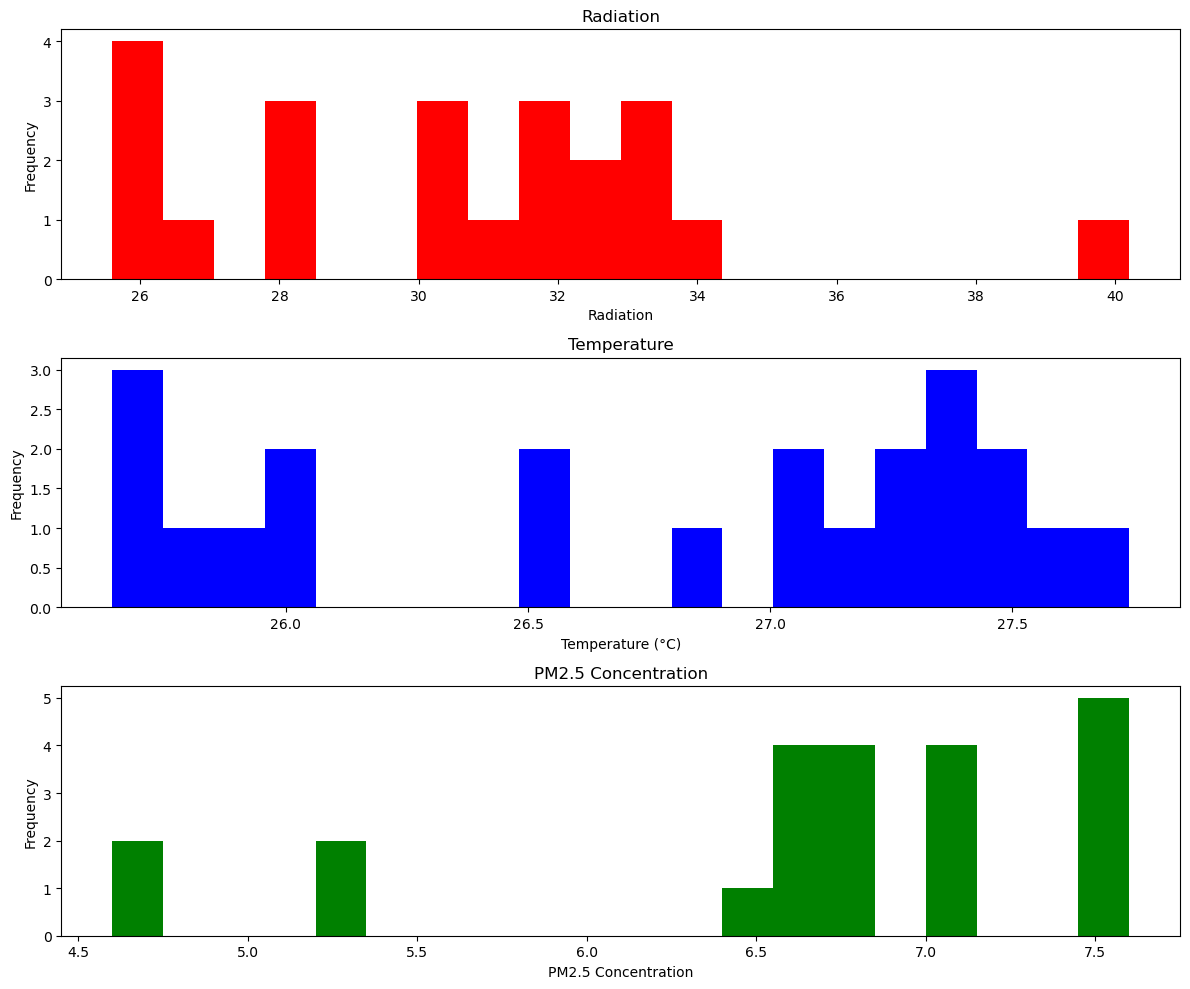

In [20]:
#b
all_locations = pd.concat([Location1, Location2, Location3])
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.hist(all_locations['counts'], bins=20, color='red')
plt.title('Radiation')
plt.xlabel('Radiation')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(all_locations['Temperature'], bins=20, color='blue')
plt.title('Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(all_locations['PM25'], bins=20, color='green')
plt.title('PM2.5 Concentration')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
#Mean and standard deviation 
mean_counts = all_locations['counts'].mean()
std_counts = all_locations['counts'].std()

mean_temperature = all_locations['Temperature'].mean()
std_temperature = all_locations['Temperature'].std()

mean_pm25 = all_locations['PM25'].mean()
std_pm25 = all_locations['PM25'].std()

print('Rad: Mean', mean_counts,'Standard Deviation:', std_counts)
print('Temp: Mean', mean_temperature, 'Standard Deviation:', std_temperature)
print('PM2.5: Mean', mean_pm25, 'Standard Deviation:', std_pm25)

27.371428571428574 32.725 31.25714285714286
Rad: Mean 30.55454545454545 Standard Deviation: 3.5083203514376637
Temp: Mean 26.767008167613643 Standard Deviation: 0.7343185790029871
PM2.5: Mean 6.618181818181816 Standard Deviation: 0.9194389405327389


Off the three histograms, the temperature distribution is most similar to a normal distribution. The PM2.5 concentration and radiation measured for each location varied greatly, which is why the data sets don't follow a normal distribution.

In [42]:
# mean and std for each location separately 
mean1 = Location1['counts'].mean()
mean2 = Location2['counts'].mean()
mean3 = Location3['counts'].mean()
print(mean1, mean2, mean3)
std1 = Location1['counts'].std()
std2 = Location2['counts'].std()
std3 = Location3['counts'].std()
print(std1, std2, std3)

27.371428571428574 32.725 31.25714285714286
2.6818614715120837 3.4656477440320295 1.7877892706329999


In [27]:
# c
expected_counts = np.sqrt(mean_counts)

print("Expected:", expected_counts)
print("Measured:", std_counts)

Expected: 5.52761661609644
Measured: 3.5083203514376637


The expected standard deviation of the radiation counts is larger than the actual value. This could be due to various factors including: sensitivity of the sensor, background radiation, and the difference in location the data was collected from.

In [41]:
# d
# for the mean of all data sets combined
N_samples = 22
N = len(all_locations['counts'])
sigma = np.sqrt(N) / np.sqrt(2*np.sqrt(N_samples))
print("Uncertainty:",sigma)

# for each mean individually 
def calculate_uncertainty(N_samples, counts):
    N = len(counts)
    sigma = np.sqrt(N) / np.sqrt(2 * np.sqrt(N_samples))
    return sigma

N_samples1 = 7 
sigma1 = calculate_uncertainty(N_samples1, Location1['counts'])
print("Uncertainty 1:", sigma1)

N_samples2 = 7 
sigma2 = calculate_uncertainty(N_samples2, Location2['counts'])
print("Uncertainty 2:", sigma2)

N_samples3 = 8
sigma3 = calculate_uncertainty(N_samples3, Location3['counts'])
print("Uncertainty 3:", sigma3)

Uncertainty: 1.5314071568043932
Uncertainty 1: 1.150163316895603
Uncertainty 2: 1.2295763059025286
Uncertainty 3: 1.1124013965635149


e
There is less variation in the data than counting statistics indicated. This implies that the sources of radiation contributing to the data are likely from background radiation or fluctuations in different locations. 

f
Based on the mean counts in all three locations, they have similar radiation levels. The first location had the lowest counts measured and the second location had the largest average. There are no significant difference between the locations, if the locations chosen were more dispersed then we would see a larger distribution of mean counts. 